Broad question: "What 'kinds' of players are most likely to contribute a large amount of data to the dataset?".
 
Specific research question:  "Can a player's age and gender be used to predict the amount of time they spend playing Minecraft in the 'players.csv' dataset".



In [1]:
library (tidyverse)
library (repr)
library (tidymodels)
Library (GGally)
Library (ISLR)
Library (dplyn)
options (repr.matrix.max.rows = 6)
source ("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in Library(GGally): could not find function "Library"


In [2]:
players <- read_csv("https://raw.githubusercontent.com/natlogan6/Dsci100-individual-/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [3]:
player_data_filtered <- players |>
select (experience, subscribe, played_hours, gender, Age) |> 
filter (played_hours != 0.0) |> 
drop_na (Age) |>
mutate(gender = as_factor(gender)) |>
mutate(experience = as_factor (experience))

player_data_filtered

experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.1,Male,47
Veteran,TRUE,1.6,Female,23
Beginner,TRUE,1.5,Female,25
Amateur,TRUE,0.2,Male,22
Amateur,TRUE,48.4,Female,17


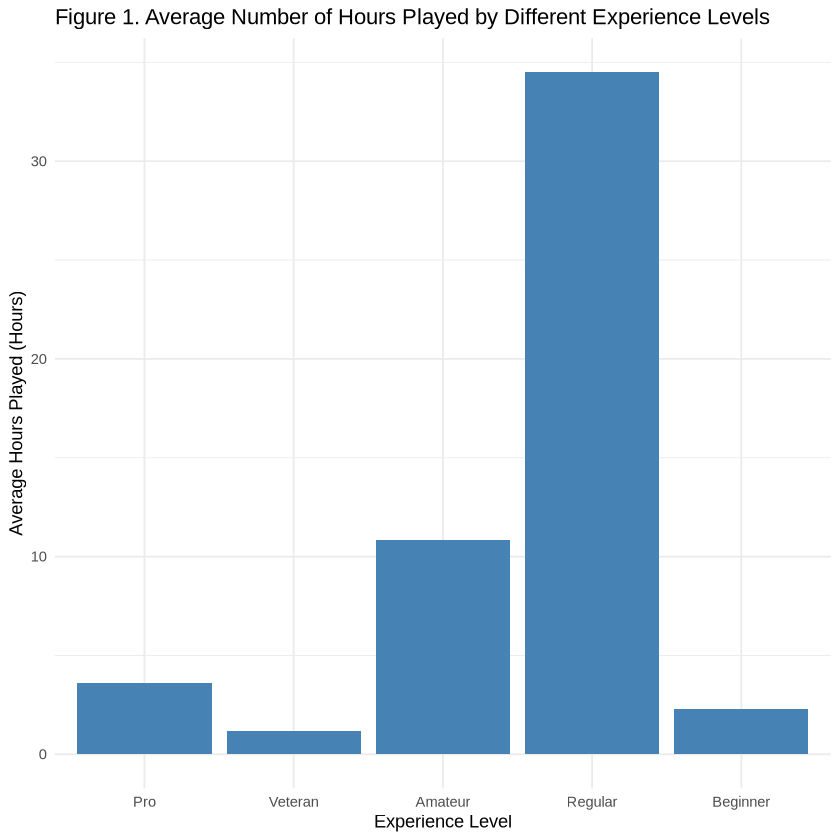

In [4]:
player_data_experience_mean <- player_data_filtered |>
group_by (experience) |>
summarise(played_hours = mean (played_hours, na.rm = TRUE) )


ggplot (player_data_experience_mean, aes(x = experience, y = played_hours)) +
geom_bar (stat = "identity", fill = "steelblue") +
labs (title = "Figure 1. Average Number of Hours Played by Different Experience Levels",
x = "Experience Level",
y = "Average Hours Played (Hours)") +
theme_minimal()

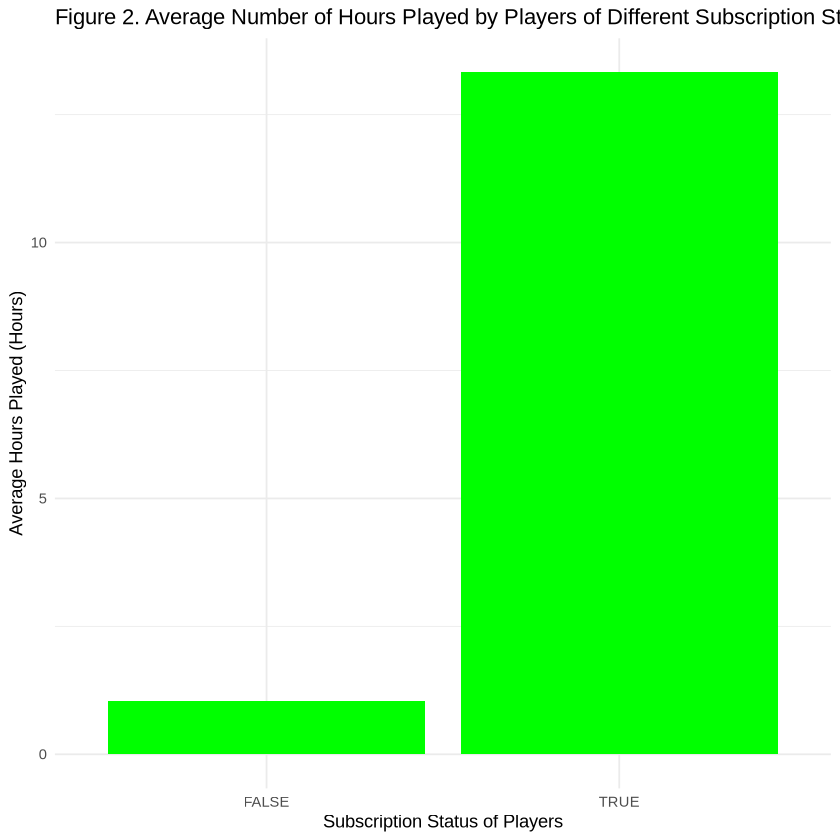

In [5]:
player_data_subscribe_mean <- player_data_filtered |>
group_by(subscribe) |>
summarise(played_hours = mean(played_hours, na.rm = TRUE))


ggplot(player_data_subscribe_mean, aes(x = subscribe, y = played_hours)) +
geom_bar (stat = "identity",
fill = "green") +
labs (title = "Figure 2. Average Number of Hours Played by Players of Different Subscription Status",
x = "Subscription Status of Players",
y = "Average Hours Played (Hours)") +
theme_minimal()

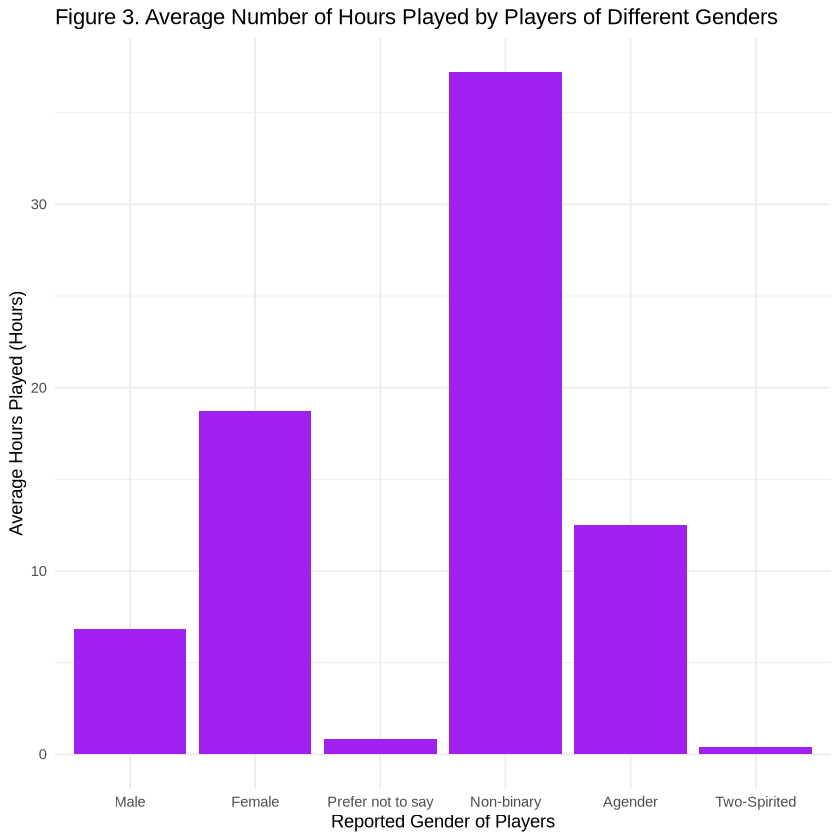

In [6]:
player_data_gender_mean <- player_data_filtered |> 
group_by (gender) |>
summarise(played_hours = mean (played_hours, na.rm = TRUE))


ggplot(player_data_gender_mean, aes (x = gender, y = played_hours) ) +
geom_bar(stat = "identity", fill = "purple") +
labs (title = "Figure 3. Average Number of Hours Played by Players of Different Genders",
x = "Reported Gender of Players",
y = "Average Hours Played (Hours)") +
theme_minimal()

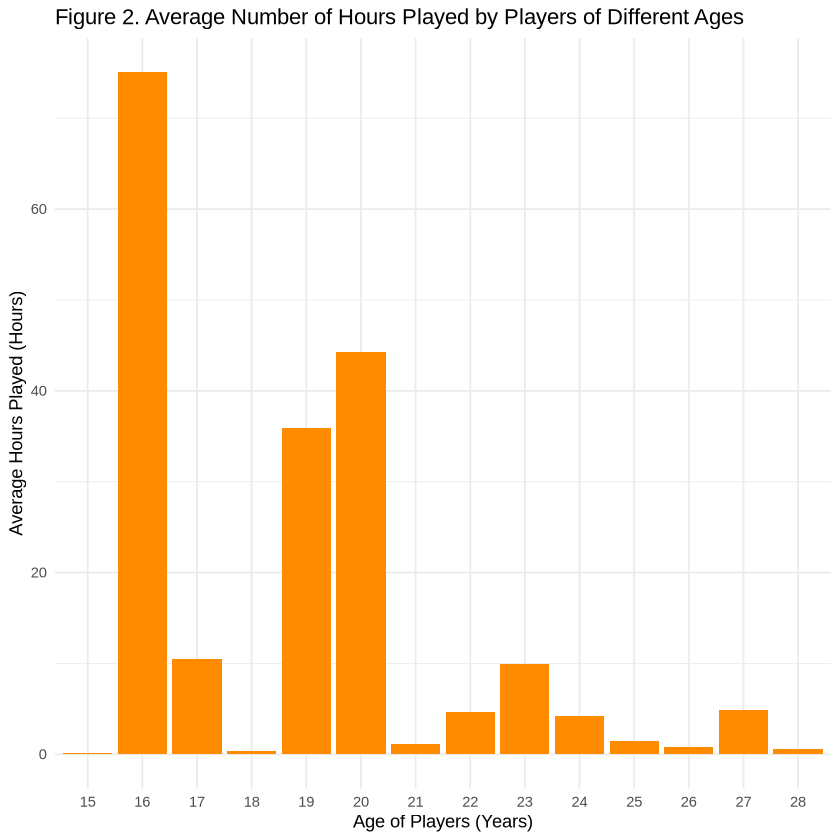

In [7]:
player_data_age_mean <- player_data_filtered |>
filter (Age >= 15 & Age <= 30) |> 
group_by (Age) |>
summarise (played_hours = mean (played_hours, na.rm = TRUE))


ggplot(player_data_age_mean, aes(x = factor(Age), y = played_hours)) +
geom_bar(stat = "identity", fill = "darkorange") +
labs (title = "Figure 2. Average Number of Hours Played by Players of Different Ages",
x = "Age of Players (Years)",
y = "Average Hours Played (Hours)") +
theme_minimal()

In [9]:
players_split <- initial_split(player_data_filtered, prop = 0.75, strata = played_hours) 
players_training <- training(players_split)
players_testing <- testing(players_split)

players_training
players_testing


experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.1,Male,47
Amateur,TRUE,0.2,Male,22
Amateur,TRUE,0.5,Male,17
Regular,TRUE,0.3,Male,58
Amateur,FALSE,0.1,Female,17
Veteran,FALSE,0.1,Male,18
Amateur,TRUE,0.1,Male,23
Veteran,TRUE,0.1,Male,21


experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Amateur,TRUE,0.7,Female,21
Veteran,TRUE,1.6,Female,23
Beginner,TRUE,1.5,Female,25
Regular,TRUE,0.6,Male,19
Veteran,TRUE,0.1,Non-binary,17
Veteran,TRUE,2.2,Male,24
Beginner,TRUE,0.4,Prefer not to say,22
Regular,TRUE,218.1,Non-binary,20


In [13]:
players_recipe <- recipe(played_hours ~ Age, data = player_data_filtered) 

players_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression") 

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          Age  
    16.0196      -0.3571  


In [15]:
players_test_results <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

players_test_results 

.pred,experience,subscribe,played_hours,gender,Age
<dbl>,<fct>,<lgl>,<dbl>,<fct>,<dbl>
12.805940,Pro,TRUE,30.3,Male,9
8.521123,Amateur,TRUE,0.7,Female,21
7.806987,Veteran,TRUE,1.6,Female,23
7.092851,Beginner,TRUE,1.5,Female,25
9.235260,Regular,TRUE,0.6,Male,19
9.949396,Veteran,TRUE,0.1,Non-binary,17
7.449919,Veteran,TRUE,2.2,Male,24
8.164055,Beginner,TRUE,0.4,Prefer not to say,22
8.878191,Regular,TRUE,218.1,Non-binary,20
